In [15]:
import numpy as np
from gaussian_process import GaussianProcess, matern52_kernel, rbf_kernel
from bayes_opt import BayesianOptimisation, expected_improvement
from samplers import gaussian_sampling
from objectives import log_likelihood
import matplotlib.pyplot as plt
from parameter_estimation import estimate_params
from lensmodel import mean_function_theta, noisy_data_calc
from packages.utils import read_and_convert, plot_final_params
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(style="white", context="paper")
plt.rcParams.update(
    {
        "axes.titlesize": 14,
        "axes.labelsize": 14,
        "legend.fontsize": 10,
        "figure.dpi": 300,
        "savefig.format": "png",
        "figure.figsize": (6, 4),
    }
)

In [13]:
# read GAIA parameters

params_df = pd.read_csv(
    "parameter_list.txt", delimiter="\s", names=["t_E", "u_min", "t_0"], header=None
)

params_df = params_df.head(5).copy()

/var/folders/dj/0r5cvjdd4_93c83t_7cz_zp40000gp/T/ipykernel_84764/179284875.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  params_df = pd.read_csv(


In [14]:
# for each colum in the dataframe, we will first generate simulated data,
# then apply the BO pipeline on the simulated data to estimate the parameters

for i in range(len(params_df)):
    t_E = params_df.iloc[i]["t_E"]
    u_min = params_df.iloc[i]["u_min"]
    t_0 = params_df.iloc[i]["t_0"]
    truevalues = [t_E, u_min, t_0]

    # generate simulated data
    times, mags = noisy_data_calc(-100, 100, truevalues, 0.1, 101)

,t_E,u_min,t_0
0,105.862140,0.588896,2643.087708
1,62.951470,0.738231,2197.721736
2,59.819440,0.201541,2241.026977
3,54.468918,1.156584,2237.518976
4,123.482200,0.253936,2604.113253


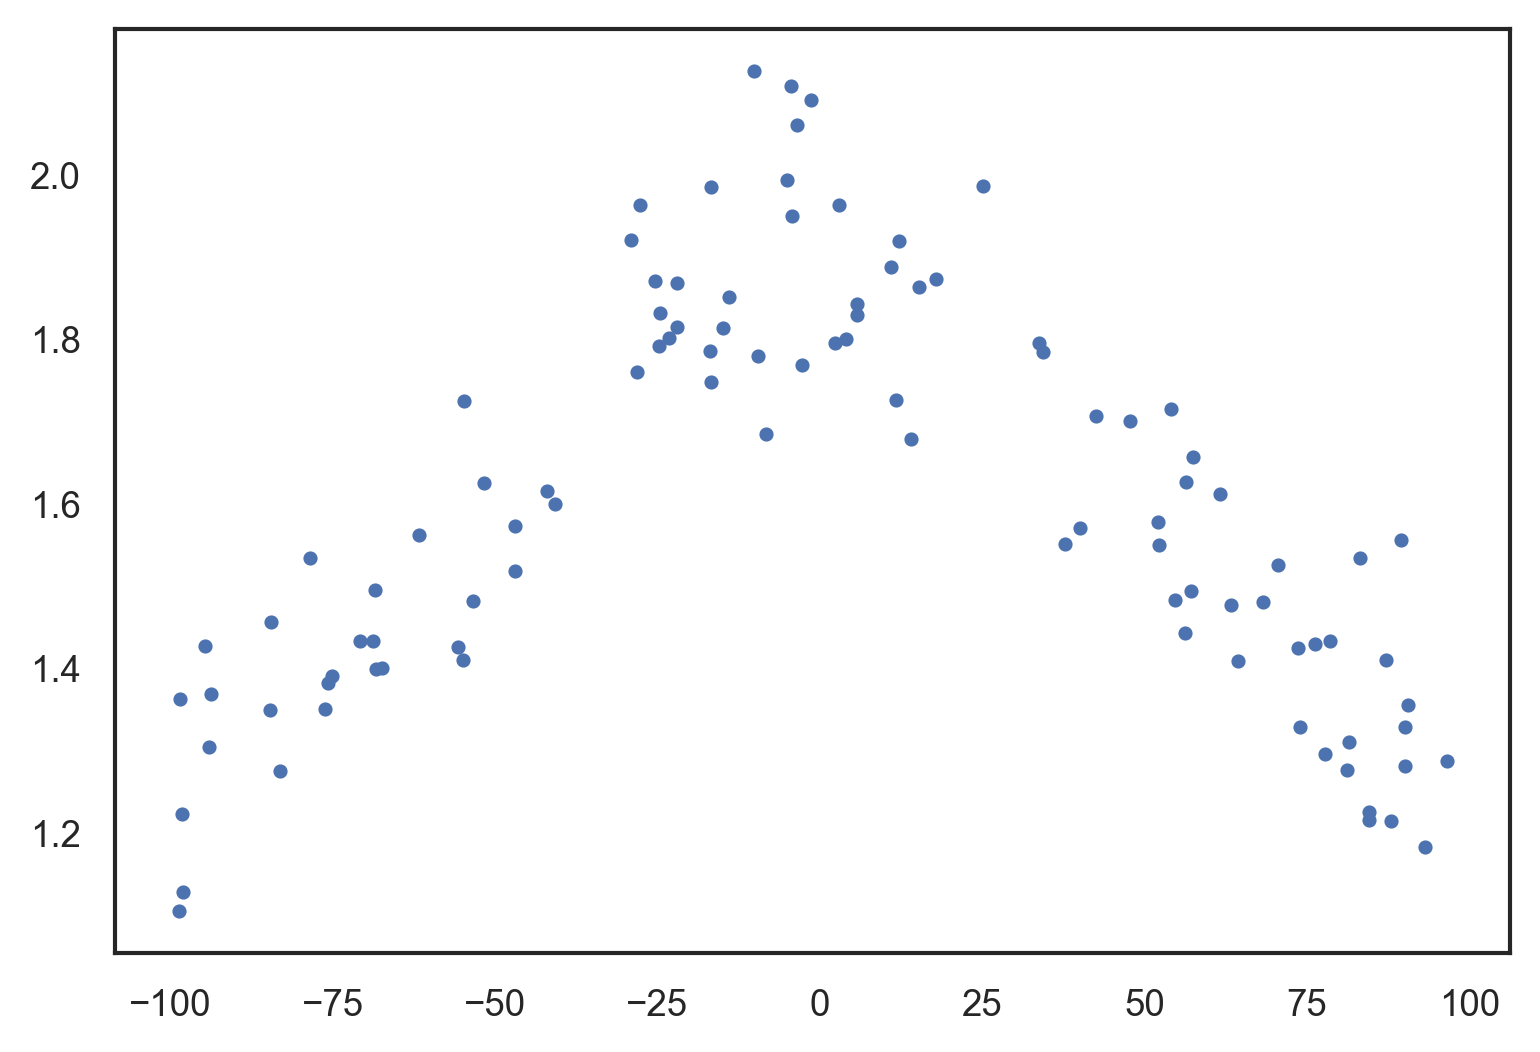

In [18]:
t_E = params_df.iloc[0]["t_E"]
u_min = params_df.iloc[0]["u_min"]
t_0 = params_df.iloc[0]["t_0"]
truevalues = [t_E, u_min, t_0]
times, mags = noisy_data_calc(-100, 100, truevalues, 0.1, 101)
plt.plot(times, mags, ".")